In [7]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Disable Warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)


# make_regression

Scikit-learn's [make_regression](http://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) method generates a random regression problem.

Outputs 

* X The input samples.
* y The output samples.
* w The weights


In [21]:
# The model without any parameter
clf = Ridge()

# The data
X, y, w = make_regression(n_samples=100, n_features=3, coef=True, random_state=88)
print("\n-------------------------------- ")
print("The weights are %s "% w)

# Initialize
coefs = []
errors = []
# alpha from 10^-6 to 10^+6 
alphas = np.logspace(-6, 6, 10)
print("\n-------------------------------- ")
print("Regularization parameter alpha %s "% alphas)

# Train the model with different regularisation strengths
for a in alphas:
    # set the alpha in the model
    clf.set_params(alpha=a)
    # Fit on the data
    clf.fit(X, y)
    # memorize the estimated coefficients
    coefs.append(clf.coef_)
    # memorize the MSE errors
    errors.append(mean_squared_error(clf.coef_, w))

print("\n-------------------------------- ")
print("True weights %s "% w)
print("\n-------------------------------- ")
print("Estimated coeffs %s "% coefs)
print("\n-------------------------------- ")
print("Errors %s "% errors)



-------------------------------- 
The weights are [ 77.7022247   70.50897719  28.76700443] 

-------------------------------- 
Regularization parameter alpha [  1.00000000e-06   2.15443469e-05   4.64158883e-04   1.00000000e-02
   2.15443469e-01   4.64158883e+00   1.00000000e+02   2.15443469e+03
   4.64158883e+04   1.00000000e+06] 

-------------------------------- 
True weights [ 77.7022247   70.50897719  28.76700443] 

-------------------------------- 
Estimated coeffs [array([ 77.70222381,  70.50897634,  28.76700401]), array([ 77.70220548,  70.508959  ,  28.7669954 ]), array([ 77.7018106 ,  70.50858527,  28.76680993]), array([ 77.69330424,  70.50053454,  28.76281463]), array([ 77.51049899,  70.32752976,  28.67699319]), array([ 73.77391353,  66.79510736,  26.93930108]), array([ 36.36354   ,  32.01755739,  11.40522542]), array([ 3.07713042,  2.60924816,  0.80786441]), array([ 0.14857505,  0.12547785,  0.03830307]), array([ 0.00690916,  0.00583392,  0.00177961])] 

--------------------

In [33]:
# Same example with more alphas and features to make for a smoother plot

# The data
X, y, w = make_regression(n_samples=100, n_features=10, coef=True, random_state=88)
print("\n-------------------------------- ")
print("The weights are %s "% w)

# Initialize
coefs = []
errors = []
# alpha from 10^-3 to 10^+3 
alphas = np.logspace(-4, 6, 100)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))



-------------------------------- 
The weights are [ 84.97280931  83.84712032  65.78877744  66.44692597  56.84373049
  37.36118054  61.56123517  72.87457277   2.91687474  98.46021532] 


# Plot

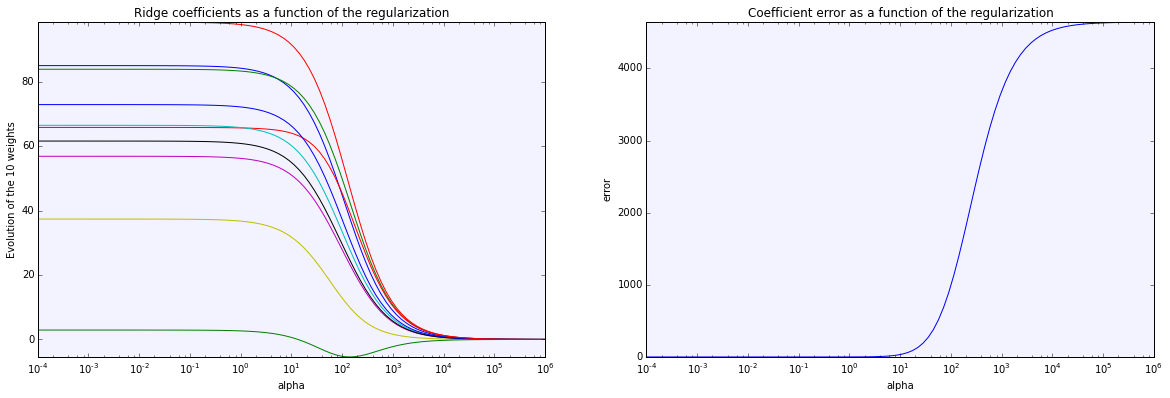

In [32]:
# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Evolution of the 10 weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()


In [36]:
print("The weights are %s "% w)
print("\n ")
print("Errors %s "% errors)


The weights are [ 84.97280931  83.84712032  65.78877744  66.44692597  56.84373049
  37.36118054  61.56123517  72.87457277   2.91687474  98.46021532] 

 
Errors [4.1058654392852688e-09, 6.5376948992596708e-09, 1.0409851078344129e-08, 1.6575410650337057e-08, 2.6392708813905912e-08, 4.2024591103508795e-08, 6.6914902674409528e-08, 1.0654718568970933e-07, 1.6965272312235102e-07, 2.7013405231222358e-07, 4.3012767457216015e-07, 6.8488061788093406e-07, 1.0905150293757207e-06, 1.7363910501842753e-06, 2.7647908989896868e-06, 4.4022592715740939e-06, 7.0095016426214327e-06, 1.1160827478500644e-05, 1.7770628229708497e-05, 2.8294729759734165e-05, 4.5050929435353602e-05, 7.1729235340688564e-05, 0.00011420401718188252, 0.00018182658929252152, 0.00028948218163147411, 0.00046086283651338583, 0.00073367400200905473, 0.001167915299071752, 0.0018590465766374672, 0.0029589133432007366, 0.0047089884694965622, 0.0074931470591428889, 0.011921387900017342, 0.018962519230360055, 0.030154187755309869, 0.047934820